In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import random

In [2]:
# Constants
DATASET_PATH = "/kaggle/input/gtsrb-german-traffic-sign"
IMG_SIZE = 32
NUM_CLASSES = 43
EPOCHS = 20
BATCH_SIZE = 64


In [3]:
# Load dataset
train_df = pd.read_csv(os.path.join(DATASET_PATH, "Train.csv"))


In [4]:
def load_images(df, dataset_path):
    X, y = [], []
    for _, row in tqdm(df.iterrows(), total=len(df)):
        img_path = os.path.join(dataset_path, row["Path"])
        image = cv2.imread(img_path)
        if image is not None:
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X.append(image)
            y.append(row["ClassId"])
    return np.array(X) / 255.0, to_categorical(np.array(y), NUM_CLASSES)

In [5]:
# Load training data
X, y = load_images(train_df, DATASET_PATH)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1))


100%|██████████| 39209/39209 [05:24<00:00, 120.79it/s]


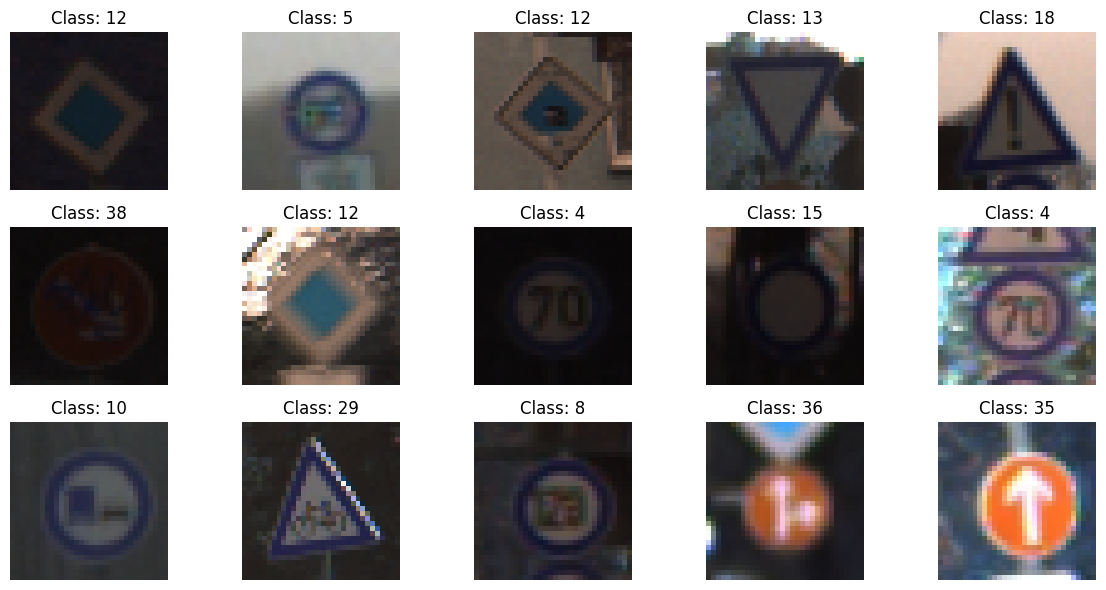

In [8]:
# Visualize sample images before training
def visualize_samples(X, y, num_samples=15):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(3, 5, i+1)
        plt.imshow(X[i])
        plt.title(f"Class: {np.argmax(y[i])}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_samples(X_train, y_train)

In [6]:
# Model architecture
def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2832 - loss: 2.6984 - val_accuracy: 0.8530 - val_loss: 0.6154
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7547 - loss: 0.7960 - val_accuracy: 0.9462 - val_loss: 0.2651
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8615 - loss: 0.4457 - val_accuracy: 0.9656 - val_loss: 0.1441
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9029 - loss: 0.3197 - val_accuracy: 0.9792 - val_loss: 0.0926
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9229 - loss: 0.2430 - val_accuracy: 0.9816 - val_loss: 0.0821
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9374 - loss: 0.2015 - val_accuracy: 0.9856 - val_loss: 0.0676
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9452 - loss: 0.1720 - val_accuracy: 0.9860 - val_loss: 0.0584
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9521 - loss: 0.1523 - val_accuracy: 0

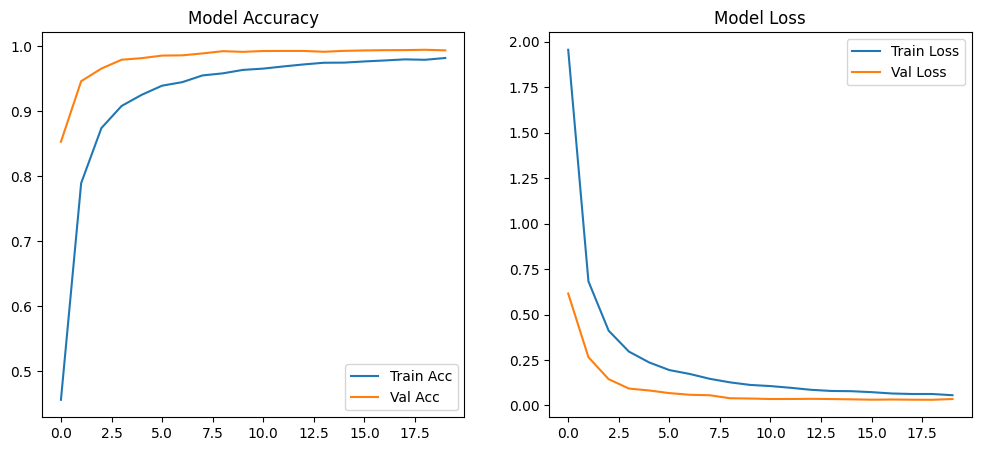

In [10]:
# Plot training results
def plot_training_results(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Train Acc")
    plt.plot(history.history['val_accuracy'], label="Val Acc")
    plt.title("Model Accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Val Loss")
    plt.title("Model Loss")
    plt.legend()
    plt.show()

plot_training_results(history)


In [11]:
# Load and evaluate test data
test_df = pd.read_csv(os.path.join(DATASET_PATH, "Test.csv"))
X_test, y_test = load_images(test_df, DATASET_PATH)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

100%|██████████| 12630/12630 [02:11<00:00, 95.78it/s] 


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9634 - loss: 0.1959
Test Accuracy: 96.33%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


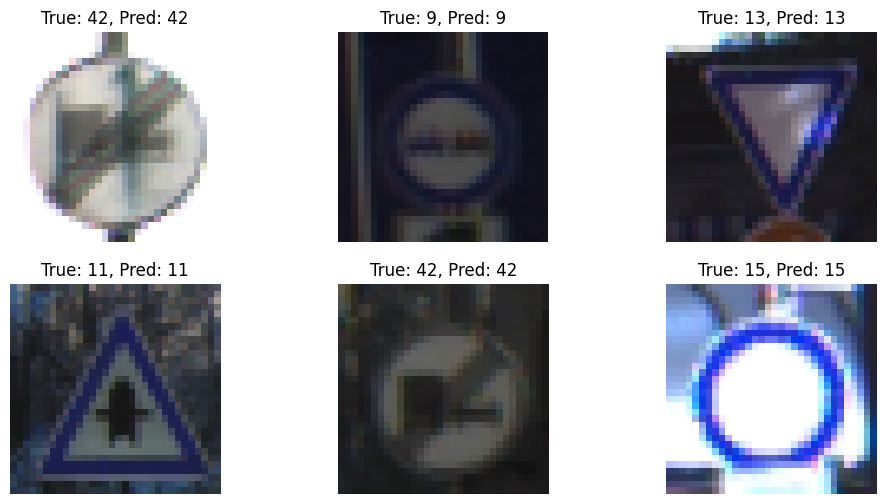

In [12]:
# Visualize predictions
def visualize_predictions(model, X, y, num_samples=6):
    plt.figure(figsize=(12, 6))
    indices = random.sample(range(len(X)), num_samples)
    for i, idx in enumerate(indices):
        img = X[idx]
        true_label = np.argmax(y[idx])
        pred_label = np.argmax(model.predict(img.reshape(1, IMG_SIZE, IMG_SIZE, 3)))
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis("off")
    plt.show()

visualize_predictions(model, X_test, y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


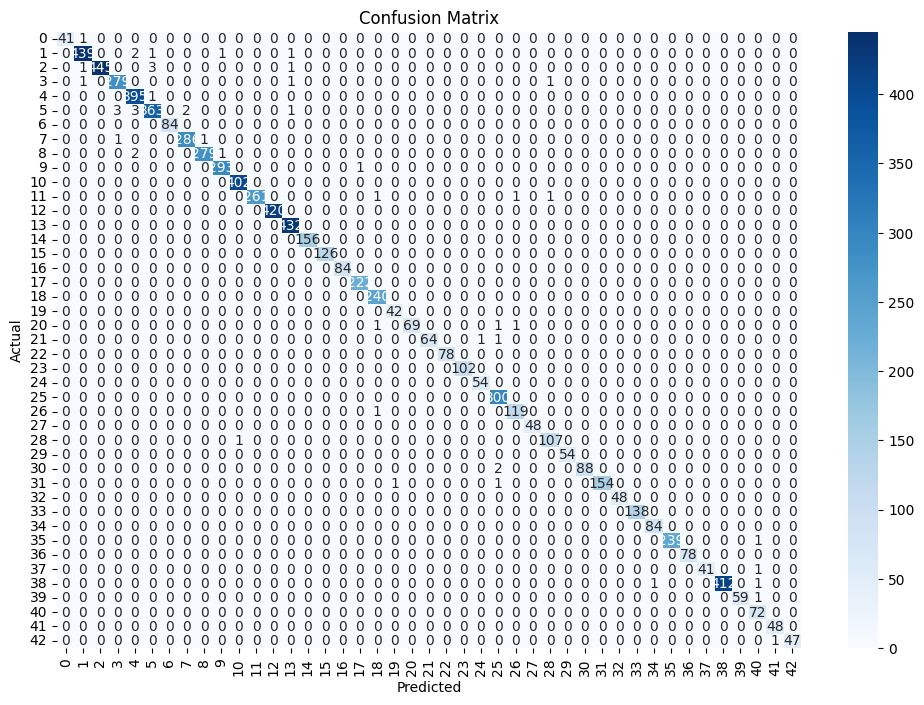

In [13]:
# Confusion matrix
y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Classification report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      0.99      0.99       444
           2       1.00      0.99      0.99       450
           3       0.99      0.99      0.99       282
           4       0.98      1.00      0.99       396
           5       0.99      0.98      0.98       372
           6       1.00      1.00      1.00        84
           7       0.99      0.99      0.99       288
           8       1.00      0.99      0.99       282
           9       0.99      1.00      0.99       294
          10       1.00      1.00      1.00       402
          11       1.00      0.99      0.99       264
          12       1.00      1.00      1.00       420
          13       0.99      1.00      1.00       432
          14       1.00      1.00      1.00       156
          15       1.00      1.00      1.00       126
          16       1.00      1.00      1.00        84
          17       1.00    

In [19]:
# Test on new data
def test_on_new_image(model, image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    print(f"Predicted Class: {predicted_class}")



In [20]:
test_on_new_image(model, "/kaggle/input/sign50/s50.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 2


In [16]:
# Convert model to TFLite
def convert_to_tflite(model, filename="traffic_sign_Recognizer.tflite"):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open(filename, "wb") as f:
        f.write(tflite_model)
    print("Model saved as TFLite.")

convert_to_tflite(model)

Saved artifact at '/tmp/tmpwl2_f5r8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 43), dtype=tf.float32, name=None)
Captures:
  135050505879072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135050505869216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135050505878016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135050505879248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135050505873616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135050496544784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135050496542144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135050496543024: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as TFLite.
